## 业务场景

通过用户过去三个月的消费信息（流量，上网时长，通话时长，缴费金额等），预测用户下月流量，从而实现相应流量业务的精准推荐。


## 字段信息：
名称       | 说明   | 类型  |
--------------|---------|--------|-----
USER_ID     |用户标识 | INT   |
SERVICESET_FLUX| 套餐内流量（M)	| DOUBEL
ONLINE_FLUX_THISMONTH|当月流量|
ONLINE_FLUX_LASTMONTH|上个月流量|   
ONLINE_FLUX_TWOMONTHSAGO|上上个月前流量|
ONLINE_DURATION_THISMONTH|当月上网时长|
ONLINE_DURATION_LASTMONTH|上个月上网时长（分）|
ONLINE_DURATION_TWOMONTHSAGO|上个月上网时长（分）|
CALL_DURATION_THISMONTH|当月通话时长（分）|
CALL_DURATION_LASTMONTH|上个月通话时长（分）|
CALL_DURATION_TWOMONTHSAGO|上个月通话时长（分）|
NET_DURATION |入网时长（天） |LONG
LAST_RECHARGE_VALUE|最近一次缴费金额（元）
TOTAL_RECHARGE_VALUE|近三个月缴费金额(元)|
TOTAL_RECHARGE_COUNT|近三个月缴费次数|
TOTAL_OWE_COUNT|近三个月欠费次数（次）	|INT
BALANCED |余额| double
ONLINE_FLUX_NEXTMONTH|下个月流量|




In [3]:
#导入常用的库
# numpy: python中常用的多维数值计算库，常用简称 np
# pandas:python中的数据分析库，常用简称 pd
# matplotlib :python中的图形库，常用简称plt
# %matplotlib inline：IPython魔法函数（Magic Functions），可以内嵌绘图，并且可以省略掉plt.show()这一步

#约4行代码
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 读取数据

In [5]:
#使用pandas的读取csv文件的函数 pd.read_csv(),生成数据的dataframe
#数据文件名：carrier_linearRegeression.csv
#编码格式：utf8
#分隔符： 逗号
#约1行代码
data = pd.read_csv('/data/carrier_linearRegeression.csv',encoding='utf8')

#显示前5行
#约1行代码
data.head()

We wiil read the data fromC:\Users\wwx559045.CHINA\Cou_code\Carrier_ML\data\carrier_linearRegeression.csv


,USER_ID,SERVICE,SERVICESET_FLUX,ONLINE_FLUX_THISMONTH,ONLINE_FLUX_LASTMONTH,ONLINE_FLUX_TWOMONTHSAGO,ONLINE_DURATION_THISMONTH,ONLINE_DURATION_LASTMONTH,ONLINE_DURATION_TWOMONTHSAGO,CALL_DURATION_THISMONTH,CALL_DURATION_LASTMONTH,CALL_DURATION_TWOMONTHSAGO,NET_DURATION,LAST_RECHARGE_VALUE,TOTAL_RECHARGE_VALUE,TOTAL_RECHARGE_COUNT,TOTAL_OWE_COUNT,BALANCED,ONLINE_FLUX_NEXTMONTH
0,78002,2G,700,298.0,441.0,485.0,151.0,74.0,151.0,102.0,100.0,127.0,206.0,58.0,383.0,4.0,1.240987,55.0,1254.0
1,67208,2G,500,521.0,382.0,386.0,128.0,122.0,122.0,68.0,91.0,91.0,189.0,1.0,488.0,12.0,-0.826767,71.0,1121.0
2,54739,3G,400,504.0,721.0,427.0,64.0,147.0,104.0,88.0,75.0,115.0,195.0,67.0,474.0,6.0,0.086672,55.0,1132.0
3,60265,4G,400,368.0,404.0,354.0,106.0,129.0,118.0,81.0,129.0,70.0,166.0,83.0,575.0,12.0,1.643440,41.0,971.0
4,33085,3G,500,471.0,645.0,521.0,143.0,124.0,94.0,105.0,71.0,113.0,191.0,69.0,585.0,10.0,-2.131418,0.0,1262.0


### 数据探索

(array([  13.,  143.,  695., 1891., 2838., 2622., 1350.,  385.,   58.,
           5.]),
 array([ 40. , 135.5, 231. , 326.5, 422. , 517.5, 613. , 708.5, 804. ,
        899.5, 995. ]),
 <a list of 10 Patch objects>)

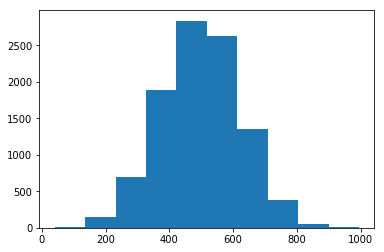

In [30]:
#当月数据使用量的分布情况

#使用plt.hist()方法
#约1-2行代码
plt.hist(data.iloc[:,3])

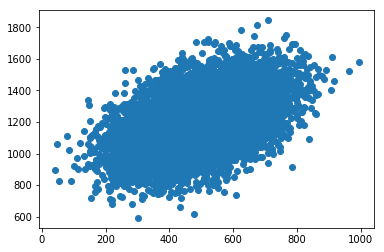

In [31]:
#当月数据流量和下月数据流量的关系

#使用plt.scatter()方法
#横轴：套餐流量（标准化），纵轴:下个月使用流量
#约1-2行代码

plt.scatter(data.iloc[:,3],data.iloc[:,-1])

## 数据预处理

In [32]:
#分离特征数据为X 和目标数据为y

#使用dataframe的i.lloc或者.loc方法选取不同字段（列）
X = data.iloc[:,1:-1]
y= data.iloc[:,-1]

#打印特征数据为X 和目标数据y的形状：
print('The shape of X is {0}'.format(X.shape))
print('The shape of y is {0}'.format(y.shape))

The shape of X is (10000, 17)
The shape of y is (10000,)


### 类别特征编码
将SERVICE类型变量转化为0-1编码的格式，从而可以进行数值计算

In [33]:
# 引入  sklearn.preprocessing类中的OneHotEncoder算法库
from sklearn.preprocessing import OneHotEncoder

#设计map函数
def service_mapping(cell):
    if cell=='2G':
        return 2
    elif cell=='3G':
        return 3
    elif cell=='4G':
        return 4

#将业务类型的string型值映射为整数型
service_map = X['SERVICE'].map(service_mapping)

#转换为dataframe
service = pd.DataFrame(service_map)

#生成用OncHotEncoder实例
enc = OneHotEncoder()

#使用OncHotEncoder转化类型特征为0/1编码的多维特征
service_enc = enc.fit_transform(service).toarray()

#提取0/1编码的多维特征的名称
service_names = enc.active_features_.tolist()
service_newname=[str(x)+'G' for x in service_names]

#生成0-1编码的dataframe
service_df = pd.DataFrame(service_enc,columns=service_newname)

#将生成0-1编码的dataframe加入原有特征数据，生成新的特征数据矩阵X_enc 
X_enc = pd.concat([X,service_df],axis = 1).drop('SERVICE',axis=1)

#显示前5行
X_enc.head()

,SERVICESET_FLUX,ONLINE_FLUX_THISMONTH,ONLINE_FLUX_LASTMONTH,ONLINE_FLUX_TWOMONTHSAGO,ONLINE_DURATION_THISMONTH,ONLINE_DURATION_LASTMONTH,ONLINE_DURATION_TWOMONTHSAGO,CALL_DURATION_THISMONTH,CALL_DURATION_LASTMONTH,CALL_DURATION_TWOMONTHSAGO,NET_DURATION,LAST_RECHARGE_VALUE,TOTAL_RECHARGE_VALUE,TOTAL_RECHARGE_COUNT,TOTAL_OWE_COUNT,BALANCED,2G,3G,4G
0,700,298.0,441.0,485.0,151.0,74.0,151.0,102.0,100.0,127.0,206.0,58.0,383.0,4.0,1.240987,55.0,1.0,0.0,0.0
1,500,521.0,382.0,386.0,128.0,122.0,122.0,68.0,91.0,91.0,189.0,1.0,488.0,12.0,-0.826767,71.0,1.0,0.0,0.0
2,400,504.0,721.0,427.0,64.0,147.0,104.0,88.0,75.0,115.0,195.0,67.0,474.0,6.0,0.086672,55.0,0.0,1.0,0.0
3,400,368.0,404.0,354.0,106.0,129.0,118.0,81.0,129.0,70.0,166.0,83.0,575.0,12.0,1.643440,41.0,0.0,0.0,1.0
4,500,471.0,645.0,521.0,143.0,124.0,94.0,105.0,71.0,113.0,191.0,69.0,585.0,10.0,-2.131418,0.0,0.0,1.0,0.0


### 数据标准化

In [34]:
#引入 sklearn.preprocessing类的scale方法
from sklearn.preprocessing import scale

#对新的特征数据矩阵X_enc ，沿着行axis=0对数据做标准化处理,生成X_scaled
X_scaled = scale(X_enc,axis =0)

#打印标准化后的数据
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 1.26476607e-16  1.58095759e-16 -8.38440428e-17  8.88178420e-17
 -2.41584530e-16 -2.70716782e-16  1.88293825e-16 -3.54205554e-16
 -2.43716158e-16 -3.24007488e-16 -7.81597009e-17 -8.17124146e-18
 -9.69890834e-17 -5.40012479e-17 -2.34479103e-17  6.28830321e-17
 -4.93827201e-17 -1.60760294e-17 -1.03028697e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 分割数据集

In [35]:
# 引入sklearn.model_selection的方法train_test_split
from sklearn.model_selection import train_test_split

#按照0.8:0.2的比例，分割训练集和测试集：X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, 
                                                 random_state=112)

#打印分割后的训练集和测试集：X_train,X_test的形状
print('The shape of X_train is {0}'.format(X_train.shape))
print('The shape of X_test is {0}'.format(X_test.shape))

The shape of X_train is (8000, 19)
The shape of X_test is (2000, 19)


### 训练简单模型: 线性回归模型

In [36]:
# 引入sklearn的线性回归算法库：linear_model
from sklearn import linear_model

# 使用LinearRegression()模型，进行实例化
linear_reg =linear_model.LinearRegression()

#该实例在训练集上训练模型
#使用.fit()方法
linear_reg.fit(X_train,y_train)

#训练好的模型在测试集上预测
#使用.predict()方法
y_pred_01 = linear_reg.predict(X_test)

### 线性回归模型评估模型

Model Evaluating as follows:
Coefficients: 
 [ 7.67236795e+01  7.91049909e+01  6.02976658e+01  5.76022193e+01
  3.93120315e+01  3.56950577e+01  3.42793723e+01  1.81484424e+01
  5.13677453e+00  1.07864431e+00 -1.18651579e+00  1.18647723e-01
  4.07897044e-01 -3.54118403e-02 -2.18652816e-01  3.23239055e-01
  1.97678099e+14  1.97257940e+14  1.96163158e+14]
Mean squared error: 3115.70
Variance score: 0.88


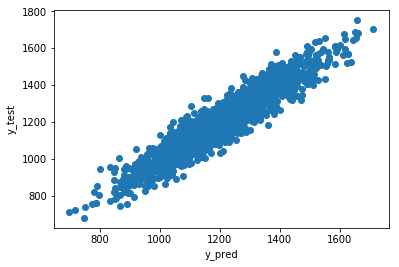

In [37]:
#引入sklearn类中的 metrics测度类
from sklearn import metrics

#设计评估模型函数
def evaluate_model(model,test,pred):
    print('Model Evaluating as follows:')
    # 打印线性模型的系数：The coefficients
    print('Coefficients: \n', model.coef_)
    # 打印线性模型预测的均方差：The mean squared error
    print("Mean squared error: %.2f"%metrics.mean_squared_error(test,pred))
    
    #打印线性模型预测的R2：
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % metrics.r2_score(test,pred))
    
    #输出预测值和实际值的散点图
    plt.scatter(pred,test)
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.show()

evaluate_model(linear_reg,y_test,y_pred_01)

然而，对于普通最小二乘的系数估计问题，其依赖于模型各项的相互独立性。当各项是相关的，且设计矩阵 X 的各列近似线性相关，那么，设计矩阵会趋向于奇异矩阵，这会导致最小二乘估计对于随机误差非常敏感，产生很大的方差。  
例如，在没有实验设计的情况下收集到的数据，这种多重共线性（multicollinearity）的情况可能真的会出现。

## 岭回归
Ridge 回归通过对系数的大小施加惩罚来解决 普通最小二乘法 的一些问题。 岭系数最小化的是带罚项的残差平方和 

  $min\{||y-X\beta||_2+\alpha ||w||_2^2\}$

### 训练简单ridge模型

Model Evaluating as follows:
Coefficients: 
 [ 7.67306611e+01  7.90642784e+01  6.03399843e+01  5.76017493e+01
  3.93143049e+01  3.56872055e+01  3.42854553e+01  1.81786342e+01
  5.12712087e+00  1.08571893e+00 -1.18710615e+00  1.08628447e-01
  4.16923844e-01 -5.23501120e-02 -2.23808696e-01  3.28385709e-01
  4.17460964e-01 -7.34610009e-02 -3.46813972e-01]
Mean squared error: 3115.60
Variance score: 0.88


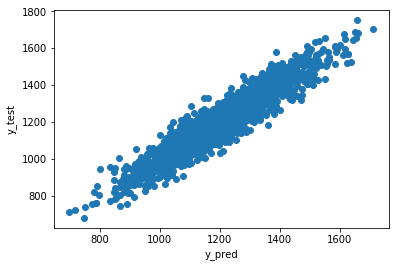

In [38]:
#使用linear_model.Ridge()方法，生成设置 alpha= 0.1 的ridge regression的实例：
ridge = linear_model.Ridge(alpha =0.1)

#在训练集上训练
ridge.fit(X_train,y_train)

#在测试集上预测
y_pred02 = ridge.predict(X_test)

#模型评估
evaluate_model(ridge,y_test,y_pred02)

### 交叉验证：选择Ridge回归超参数α
RidgeCV 通过内置的 Alpha 参数的交叉验证来实现岭回归。 该对象与 GridSearchCV 的使用方法相同，只是它默认为 Generalized Cross-Validation(广义交叉验证 GCV)，这是一种有效的留一验证方法（LOO-CV）:


0.5623413251903491
Model Evaluating as follows:
Coefficients: 
 [ 7.67263086e+01  7.90596516e+01  6.03363621e+01  5.75985286e+01
  3.93121447e+01  3.56850439e+01  3.42833040e+01  1.81774269e+01
  5.12685111e+00  1.08546986e+00 -1.18690657e+00  1.08778654e-01
  4.16795528e-01 -5.22649486e-02 -2.23786953e-01  3.28402706e-01
  4.17426872e-01 -7.33871619e-02 -3.46853868e-01]
Mean squared error: 3115.61
Variance score: 0.88


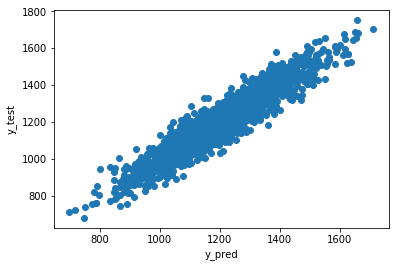

In [39]:
#设置alpha范围：10^-10 - 10^3 (该范围需要根据实际数据情况不断调整)
# 使用np.logspace()方法
alphas= np.logspace(-10,3,13)

#创建RidgeCV实例
#参数可以设置为cv=10,scoring='neg_mean_squared_error'

ridgeCV = linear_model.RidgeCV(alphas=alphas,cv=10,
                               scoring='neg_mean_squared_error')

#在训练样本上训练模型
ridgeCV.fit(X_train,y_train)

#得到最优的超参appha
#使用ridgeCV实例的.alpha属性
print(ridgeCV.alpha_)

#评估模型
evaluate_model(ridgeCV,y_test,ridgeCV.predict(X_test))

## Lasso
The Lasso 是估计稀疏系数的线性模型。 它在一些情况下是有用的，因为它倾向于使用具有较少参数值的情况，有效地减少给定解决方案所依赖变量的数量。 因此，Lasso 及其变体是压缩感知领域的基础。 在一定条件下，它可以恢复一组非零权重的精确集（见 Compressive sensing: tomography reconstruction with L1 prior (Lasso) ）

### 生成简单Lasso模型

Model Evaluating as follows:
Coefficients: 
 [66.62629387 68.79163586 49.87689187 47.91839048 29.63603084 25.46432564
 23.91314098  7.94697561  0.          0.         -0.          0.
  0.          0.         -0.          0.          0.          0.
 -0.        ]
Mean squared error: 4021.86
Variance score: 0.85


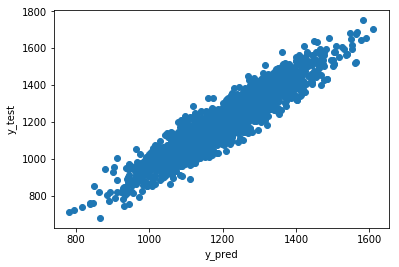

In [40]:
#使用linear_model.Lasso（）方法，生成设置 alpha= 10 的lasso regression的实例：
lasso = linear_model.Lasso(alpha =10)

#在训练集上训练
lasso.fit(X_train,y_train)

#在测试集上预测
y_pred03 = lasso.predict(X_test)

#模型评估
evaluate_model(lasso,y_test,y_pred03)

### 交叉验证：选择Lasso回归超参数α

0.18329807108324336
Model Evaluating as follows:
Coefficients: 
 [ 7.65448873e+01  7.88800330e+01  6.01460594e+01  5.74181239e+01
  3.91407073e+01  3.54964108e+01  3.40881430e+01  1.79863268e+01
  4.95142405e+00  8.80947564e-01 -9.82455233e-01  0.00000000e+00
  2.27396412e-01 -0.00000000e+00 -3.55252644e-02  1.39471805e-01
  3.53451965e-01 -0.00000000e+00 -1.68581012e-01]
Mean squared error: 3115.71
Variance score: 0.88


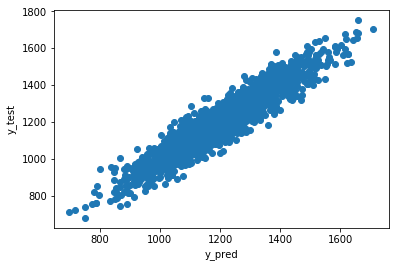

In [41]:
#设置alpha范围：10^-5 - 10^4 (该范围需要根据实际数据情况不断调整)
alphas = np.logspace(-5,4,20)

#创建 LassoCV 实例
#使用linear_model.LassoCV()方法，由于alpha值很小的时候，保证算法收敛，需要增大迭代次数：max_iter=10000
lassoCV = linear_model.LassoCV(alphas = alphas,max_iter=10000)

#在训练样本上做CV
lassoCV.fit(X_train,y_train)

#得到最优的超参appha
#使用lassoCV的.alpha属性
print(lassoCV.alpha_)

#模型评估
evaluate_model(lassoCV,y_test,lassoCV.predict(X_test))

### α 和θ的关系
超参$\alpha$与回归系数θ的关系：α越大，那么正则项惩罚的就越厉害，得到回归系数θ就越小，最终趋近与0。而如果α越小，即正则化项越小，那么回归系数θ就越来越接近于普通的线性回归系数。

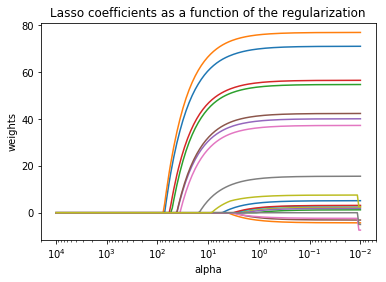

In [42]:
#设置alpha取值的个数
n_alphas = 200
# alphas count is 200, 都在10的-10次方和10的-2次方之间
alphas = np.logspace(-2, 4, n_alphas)

# 有了这200个超参数α，我们做200次循环，分别求出各个超参数对应的θ(10个维度)，存起来后面画图用
Lasso = linear_model.Lasso(fit_intercept=False,max_iter=100000)
coefs = []
# 循环200次
for a in alphas:
    #设置本次循环的超参数
    Lasso.set_params(alpha=a)
    #针对每个alpha做 Lasso或者 ridge回归
    Lasso.fit(X_train, y_train)
    # 把每一个超参数alpha对应的theta存下来
    coefs.append(Lasso.coef_)

# 有了200个超参数α，以及对应的θ，我们可以画图了。
ax = plt.gca()
# 我们的图是以alphas为x轴，20个维度为y轴画的。
ax.plot(alphas, coefs)
#将alpha的值取对数便于画图
ax.set_xscale('log')
#翻转x轴的大小方向，让alpha从大到小显示
ax.set_xlim(ax.get_xlim()[::-1]) 

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()